In [1]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [2]:
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import *
from qiskit.quantum_info import state_fidelity
from qiskit import *

# 1. The QASM Simulator is the main Qiskit Aer backend. 
# This backend emulates execution of a quantum circuits on a real device and returns measurement counts.
backendQasm = BasicAer.get_backend('qasm_simulator')

# 2. The Statevector Simulator is an auxiliary backend for Qiskit Aer. 
# It simulates the ideal execution of a quantum circuit and returns the final quantum state vector of the device at the end of simulation. 
# This is useful for education, as well as the theoretical study and debugging of algorithms.
backendStatevector = BasicAer.get_backend('statevector_simulator')

# 3. The Unitary Simulator is another auxiliary backend for Qiskit Aer. 
# It allows simulation of the final unitary matrix implemented by an ideal quantum circuit. 
# This is also useful for education and algorithm studies.
backend = BasicAer.get_backend('unitary_simulator')

The single-qubit gates available are: u gates, Identity gate, Pauli gates, Clifford gates, C3 gates, Standard rotation gates.

# U2Gate

In [3]:
q = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(q,cr)

qc.u2(pi/2,pi/2,q)
qc.draw()

┌───────────────┐
q0_0: ┤ U2(pi/2,pi/2) ├
      └───────────────┘
c0_0: ═════════════════

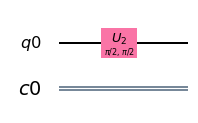

In [4]:
qc.draw(output="mpl")

In [5]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

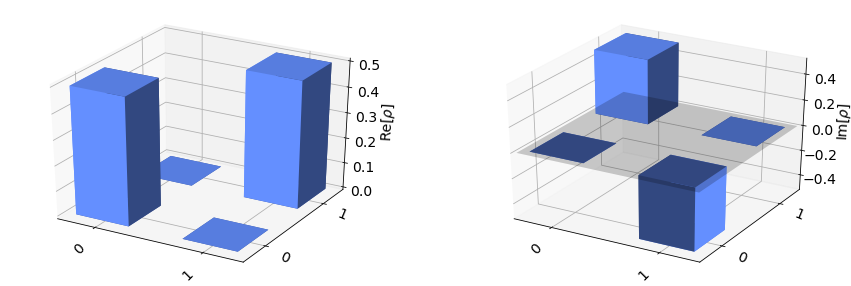

In [6]:
job = execute(qc, backendStatevector)
outputstate = job.result().get_statevector(qc)
#print(outputstate)
plot_state_city(outputstate)

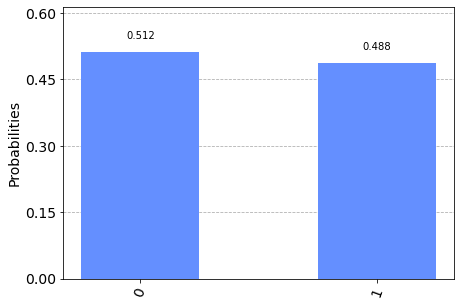

In [7]:
qc.measure(0,0)
job = execute(qc, backendQasm)
counts = job.result().get_counts(qc)
#print(counts)
plot_histogram(counts)